<a href="https://colab.research.google.com/github/Joygarden425/AI-Project/blob/main/SIFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def sift_image_matching(img1, img2):
    # 이미지를 그레이스케일로 변환
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # SIFT 검출기 초기화
    sift = cv2.SIFT_create()

    # 키포인트 검출과 디스크립터 계산
    keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

    # BFMatcher 객체 생성
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

    # 디스크립터 매칭
    matches = bf.match(descriptors1, descriptors2)

    # 매칭 결과에 따라 거리 기준으로 정렬
    matches = sorted(matches, key=lambda x: x.distance)

    # 매칭 결과 그리기
    img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:50], None, flags=2)

    # 결과 이미지 표시
    plt.figure(figsize=(16, 8))
    plt.imshow(img_matches)
    plt.show()

    # 매칭 정확도 평가
    if len(matches) > 10:
        src_pts = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
        dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
        matchesMask = mask.ravel().tolist()

        h, w = img1.shape[:2]
        pts = np.float32([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2)
        dst = cv2.perspectiveTransform(pts, M)

        img2 = cv2.polylines(img2, [np.int32(dst)], True, (255, 0, 0), 3, cv2.LINE_AA)

        draw_params = dict(matchColor=(0, 255, 0), singlePointColor=None, matchesMask=matchesMask, flags=2)
        img_homography_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches, None, **draw_params)

        # Homography 매칭 결과 이미지 표시
        plt.figure(figsize=(16, 8))
        plt.imshow(img_homography_matches)
        plt.show()

        print("Homography found with {} inliers out of {} matches".format(np.sum(matchesMask), len(matches)))
    else:
        print("Not enough matches are found - {}/{}".format(len(matches), 10))

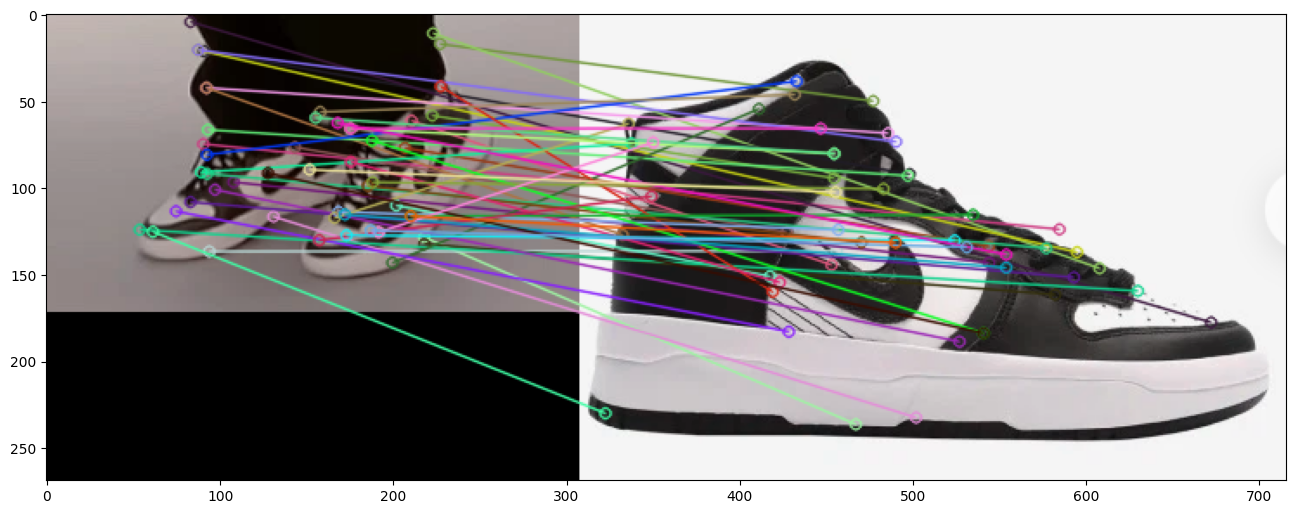

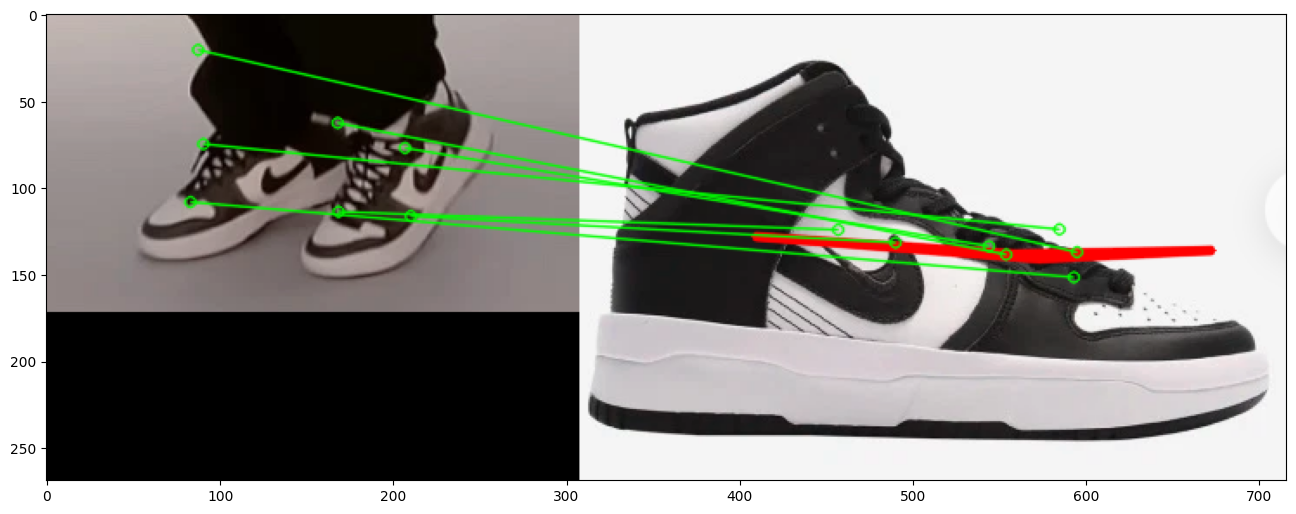

Homography found with 7 inliers out of 53 matches


In [15]:
# 이미지 파일 로드
img1 = cv2.imread('/content/sample_data/sample3.png')
img2 = cv2.imread('/content/sample_data/sample2.png')

sift_image_matching(img1, img2)